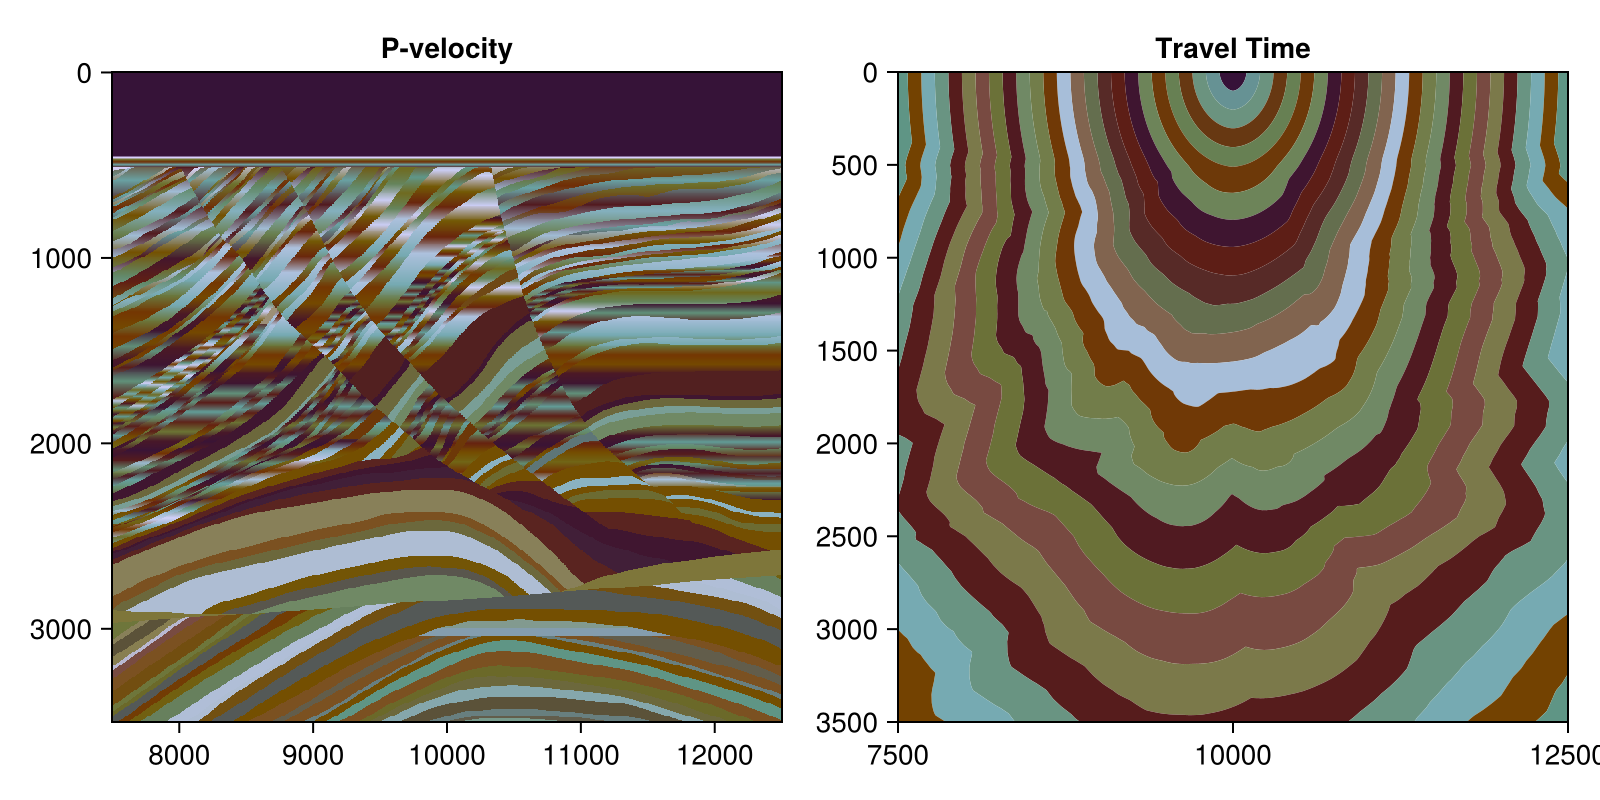

In [ ]:
using WaveFront 
using CairoMakie

# read data from txt file
filename = joinpath(@__DIR__,"marmousi.txt")
data = []
for line in eachline(filename)
    values = parse.(Float64, split(line))
    push!(data, values)
end

data = hcat(data...)'
x_coords = unique(data[:,1])
y_coords = unique(data[:,2])
vp = reshape(data[:,3], (length(x_coords), length(y_coords)))

grid_vp = Grid2D(x_coords, y_coords, vp)

source = [(10000, 0)]
tt_vp = fast_sweeping(grid_vp, source)

# plot 
fig = Figure(size=(800,400)) 
cm = :glasgowS
ax1 = Axis(fig[1,1], yreversed=true, title="P-velocity")
heatmap!(ax1, x_coords, y_coords, vp, colormap=cm)

ax2 = Axis(fig[1,2], yreversed=true, title="Travel Time")
contourf!(ax2, x_coords, y_coords, tt_vp, levels=25, colormap=cm)
fig 
